In [4]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
sns.set(style='darkgrid')
import statsmodels.api as smf

In [2]:
df = pd.read_csv('HousingData.csv')

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


Attribute Information:

1. CRIM: per capita crime rate by town

2. ZN: proportion of residential land zoned for lots over25,000 sq.ft.

3. INDUS: proportion of non-retail business acres per town

4. CHAS: Charles River dummy variable (= 1 if tract boundsriver; 0 otherwise)

5. NOX: nitric oxides concentration (parts per 10 million)

6. RM: average number of rooms per dwelling

7. AGE: proportion of owner-occupied units built prior to 1940

8. DIS: weighted distances to five Boston employment centres

9. RAD: index of accessibility to radial highways

10. TAX: full-value property-tax rate per $10,000

11. PTRATIO: pupil-teacher ratio by town

12. B1000(Bk - 0.63)^2 where Bk is the proportion of blacksby town

13. LSTAT: % lower status of the population

14. MEDV: Median value of owner-occupied homes in $1000's

In [15]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [16]:
df.shape

(506, 14)

In [20]:
missing_values = df.isnull().sum().reset_index().assign(
 missing_percentage = lambda x: (x[0]/df.shape[0])*100  
).sort_values(by="missing_percentage",ascending=False).rename(columns={
    "index":"column name", 0:"missing row count","missing_percentage":"missing percentage"
})
missing_values = missing_values[missing_values['missing percentage']>0]
missing_values

,column name,missing row count,missing percentage
0,CRIM,20,3.952569
1,ZN,20,3.952569
2,INDUS,20,3.952569
3,CHAS,20,3.952569
6,AGE,20,3.952569
12,LSTAT,20,3.952569


In [26]:
df.dropna(axis=0,inplace=True)

In [27]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

# SLR - ZN vs CRIM

In [30]:
from sklearn.model_selection import train_test_split
import scipy.stats as stats

In [45]:
X_train, X_test, y_train, y_test = train_test_split(df['ZN'], df['CRIM'], test_size=0.10, random_state=0)

In [46]:
r = smf.OLS(y_train,X_train)
r1 = r.fit()
print(r1.summary())

                                 OLS Regression Results                                
Dep. Variable:                   CRIM   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.003
Method:                 Least Squares   F-statistic:                           0.004993
Date:                Fri, 29 Apr 2022   Prob (F-statistic):                       0.944
Time:                        22:32:36   Log-Likelihood:                         -1305.2
No. Observations:                 354   AIC:                                      2612.
Df Residuals:                     353   BIC:                                      2616.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [78]:
a = r1.params
a

ZN    0.001338
dtype: float64

# INDUS vs CRIM

In [47]:
X_train, X_test, y_train, y_test = train_test_split(df['INDUS'], df['CRIM'], test_size=0.10, random_state=0)

In [48]:
r = smf.OLS(y_train,X_train)
r2 = r.fit()
print(r2.summary())

                                 OLS Regression Results                                
Dep. Variable:                   CRIM   R-squared (uncentered):                   0.261
Model:                            OLS   Adj. R-squared (uncentered):              0.259
Method:                 Least Squares   F-statistic:                              124.9
Date:                Fri, 29 Apr 2022   Prob (F-statistic):                    4.99e-25
Time:                        22:32:44   Log-Likelihood:                         -1251.6
No. Observations:                 354   AIC:                                      2505.
Df Residuals:                     353   BIC:                                      2509.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [79]:
b = r2.params
b

INDUS    0.384403
dtype: float64

# CHAS vs CRIM

In [49]:
X_train, X_test, y_train, y_test = train_test_split(df['CHAS'], df['CRIM'], test_size=0.10, random_state=0)

In [50]:
r = smf.OLS(y_train,X_train)
r3 = r.fit()
print(r3.summary())

                                 OLS Regression Results                                
Dep. Variable:                   CRIM   R-squared (uncentered):                   0.003
Model:                            OLS   Adj. R-squared (uncentered):              0.000
Method:                 Least Squares   F-statistic:                              1.113
Date:                Fri, 29 Apr 2022   Prob (F-statistic):                       0.292
Time:                        22:32:49   Log-Likelihood:                         -1304.6
No. Observations:                 354   AIC:                                      2611.
Df Residuals:                     353   BIC:                                      2615.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [80]:
c = r3.params
c

CHAS    1.998132
dtype: float64

# NOX vs CRIM

In [51]:
X_train, X_test, y_train, y_test = train_test_split(df['NOX'], df['CRIM'], test_size=0.10, random_state=0)

In [52]:
r = smf.OLS(y_train,X_train)
r4 = r.fit()
print(r4.summary())

                                 OLS Regression Results                                
Dep. Variable:                   CRIM   R-squared (uncentered):                   0.195
Model:                            OLS   Adj. R-squared (uncentered):              0.193
Method:                 Least Squares   F-statistic:                              85.41
Date:                Fri, 29 Apr 2022   Prob (F-statistic):                    2.34e-18
Time:                        22:32:53   Log-Likelihood:                         -1266.8
No. Observations:                 354   AIC:                                      2536.
Df Residuals:                     353   BIC:                                      2540.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [81]:
d = r4.params
d

NOX    7.56695
dtype: float64

# RM vs CRIM

In [53]:
X_train, X_test, y_train, y_test = train_test_split(df['RM'], df['CRIM'], test_size=0.10, random_state=0)

In [54]:
r = smf.OLS(y_train,X_train)
r5 = r.fit()
print(r5.summary())

                                 OLS Regression Results                                
Dep. Variable:                   CRIM   R-squared (uncentered):                   0.119
Model:                            OLS   Adj. R-squared (uncentered):              0.117
Method:                 Least Squares   F-statistic:                              47.74
Date:                Fri, 29 Apr 2022   Prob (F-statistic):                    2.28e-11
Time:                        22:33:00   Log-Likelihood:                         -1282.7
No. Observations:                 354   AIC:                                      2567.
Df Residuals:                     353   BIC:                                      2571.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [82]:
e = r5.params
e

RM    0.526658
dtype: float64

# AGE vs CRIM

In [55]:
X_train, X_test, y_train, y_test = train_test_split(df['AGE'], df['CRIM'], test_size=0.10, random_state=0)

In [56]:
r = smf.OLS(y_train,X_train)
r6 = r.fit()
print(r6.summary())

                                 OLS Regression Results                                
Dep. Variable:                   CRIM   R-squared (uncentered):                   0.215
Model:                            OLS   Adj. R-squared (uncentered):              0.213
Method:                 Least Squares   F-statistic:                              96.58
Date:                Fri, 29 Apr 2022   Prob (F-statistic):                    2.63e-20
Time:                        22:33:06   Log-Likelihood:                         -1262.4
No. Observations:                 354   AIC:                                      2527.
Df Residuals:                     353   BIC:                                      2531.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [83]:
f = r6.params
f

AGE    0.060382
dtype: float64

# DIS vs CRIM

In [58]:
X_train, X_test, y_train, y_test = train_test_split(df['DIS'], df['CRIM'], test_size=0.10, random_state=0)

In [59]:
r = smf.OLS(y_train,X_train)
r7 = r.fit()
print(r7.summary())

                                 OLS Regression Results                                
Dep. Variable:                   CRIM   R-squared (uncentered):                   0.026
Model:                            OLS   Adj. R-squared (uncentered):              0.023
Method:                 Least Squares   F-statistic:                              9.487
Date:                Fri, 29 Apr 2022   Prob (F-statistic):                     0.00223
Time:                        22:33:40   Log-Likelihood:                         -1300.5
No. Observations:                 354   AIC:                                      2603.
Df Residuals:                     353   BIC:                                      2607.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [84]:
g = r7.params
g

DIS    0.358353
dtype: float64

# RAD vs CRIM

In [60]:
X_train, X_test, y_train, y_test = train_test_split(df['RAD'], df['CRIM'], test_size=0.10, random_state=0)

In [61]:
r = smf.OLS(y_train,X_train)
r8 = r.fit()
print(r8.summary())

                                 OLS Regression Results                                
Dep. Variable:                   CRIM   R-squared (uncentered):                   0.444
Model:                            OLS   Adj. R-squared (uncentered):              0.442
Method:                 Least Squares   F-statistic:                              281.7
Date:                Fri, 29 Apr 2022   Prob (F-statistic):                    6.74e-47
Time:                        22:34:35   Log-Likelihood:                         -1201.3
No. Observations:                 354   AIC:                                      2405.
Df Residuals:                     353   BIC:                                      2409.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [85]:
h = r8.params
h

RAD    0.516365
dtype: float64

# TAX vs CRIM

In [62]:
X_train, X_test, y_train, y_test = train_test_split(df['TAX'], df['CRIM'], test_size=0.10, random_state=0)

In [63]:
r = smf.OLS(y_train,X_train)
r9 = r.fit()
print(r9.summary())

                                 OLS Regression Results                                
Dep. Variable:                   CRIM   R-squared (uncentered):                   0.297
Model:                            OLS   Adj. R-squared (uncentered):              0.295
Method:                 Least Squares   F-statistic:                              149.4
Date:                Fri, 29 Apr 2022   Prob (F-statistic):                    6.77e-29
Time:                        22:35:22   Log-Likelihood:                         -1242.7
No. Observations:                 354   AIC:                                      2487.
Df Residuals:                     353   BIC:                                      2491.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [86]:
i = r9.params
i

TAX    0.012104
dtype: float64

# PTRATIO vs CRIM

In [64]:
X_train, X_test, y_train, y_test = train_test_split(df['PTRATIO'], df['CRIM'], test_size=0.10, random_state=0)

In [65]:
r = smf.OLS(y_train,X_train)
r10 = r.fit()
print(r10.summary())

                                 OLS Regression Results                                
Dep. Variable:                   CRIM   R-squared (uncentered):                   0.158
Model:                            OLS   Adj. R-squared (uncentered):              0.156
Method:                 Least Squares   F-statistic:                              66.19
Date:                Fri, 29 Apr 2022   Prob (F-statistic):                    7.06e-15
Time:                        22:36:07   Log-Likelihood:                         -1274.8
No. Observations:                 354   AIC:                                      2552.
Df Residuals:                     353   BIC:                                      2555.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [87]:
j = r10.params
j

PTRATIO    0.205846
dtype: float64

# B vs CRIM

In [66]:
X_train, X_test, y_train, y_test = train_test_split(df['B'], df['CRIM'], test_size=0.10, random_state=0)

In [67]:
r = smf.OLS(y_train,X_train)
r11 = r.fit()
print(r11.summary())

                                 OLS Regression Results                                
Dep. Variable:                   CRIM   R-squared (uncentered):                   0.070
Model:                            OLS   Adj. R-squared (uncentered):              0.067
Method:                 Least Squares   F-statistic:                              26.56
Date:                Fri, 29 Apr 2022   Prob (F-statistic):                    4.27e-07
Time:                        22:36:58   Log-Likelihood:                         -1292.3
No. Observations:                 354   AIC:                                      2587.
Df Residuals:                     353   BIC:                                      2591.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [88]:
k = r11.params
k

B    0.006921
dtype: float64

# LSTAT vs CRIM

In [69]:
X_train, X_test, y_train, y_test = train_test_split(df['LSTAT'], df['CRIM'], test_size=0.10, random_state=0)

In [70]:
r = smf.OLS(y_train,X_train)
r12 = r.fit()
print(r12.summary())

                                 OLS Regression Results                                
Dep. Variable:                   CRIM   R-squared (uncentered):                   0.292
Model:                            OLS   Adj. R-squared (uncentered):              0.290
Method:                 Least Squares   F-statistic:                              145.8
Date:                Fri, 29 Apr 2022   Prob (F-statistic):                    2.41e-28
Time:                        22:37:48   Log-Likelihood:                         -1244.0
No. Observations:                 354   AIC:                                      2490.
Df Residuals:                     353   BIC:                                      2494.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [89]:
l = r12.params
l

LSTAT    0.353734
dtype: float64

# MEDV vs CRIM

In [71]:
X_train, X_test, y_train, y_test = train_test_split(df['MEDV'], df['CRIM'], test_size=0.10, random_state=0)

In [72]:
r = smf.OLS(y_train,X_train)
r13 = r.fit()
print(r13.summary())

                                 OLS Regression Results                                
Dep. Variable:                   CRIM   R-squared (uncentered):                   0.041
Model:                            OLS   Adj. R-squared (uncentered):              0.038
Method:                 Least Squares   F-statistic:                              15.10
Date:                Fri, 29 Apr 2022   Prob (F-statistic):                    0.000122
Time:                        22:38:35   Log-Likelihood:                         -1297.8
No. Observations:                 354   AIC:                                      2598.
Df Residuals:                     353   BIC:                                      2601.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [90]:
m = r13.params
m

MEDV    0.081023
dtype: float64

# Multiple Regression

In [73]:
x = df[['ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV']]
y = df['CRIM']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=0)

In [75]:
reg = smf.OLS(y_train,X_train)
r = reg.fit()
print(r.summary())

                                 OLS Regression Results                                
Dep. Variable:                   CRIM   R-squared (uncentered):                   0.526
Model:                            OLS   Adj. R-squared (uncentered):              0.508
Method:                 Least Squares   F-statistic:                              29.10
Date:                Fri, 29 Apr 2022   Prob (F-statistic):                    1.19e-47
Time:                        22:42:32   Log-Likelihood:                         -1173.1
No. Observations:                 354   AIC:                                      2372.
Df Residuals:                     341   BIC:                                      2422.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [92]:
n = r.params
n

ZN         0.042336
INDUS     -0.059457
CHAS      -1.328729
NOX       -3.954960
RM         1.391044
AGE       -0.005052
DIS       -0.690762
RAD        0.553957
TAX       -0.003242
PTRATIO    0.000745
B         -0.009058
LSTAT      0.233391
MEDV      -0.147881
dtype: float64

### We reject the null hypothesis for the predictors AGE, TAX, B and MDEV

In [101]:
x = [a,b,c,d,e,f,g,h,i,j,k,l,m]

In [102]:
y = []
for i in n:
    y.append(i)
print(y)

[0.04233611615945593, -0.05945660020619671, -1.328729251854117, -3.95496045831237, 1.3910439912311723, -0.005052047764636528, -0.6907615091088959, 0.5539570364771718, -0.003241981446087546, 0.0007447036737405488, -0.0090576609389619, 0.23339085288083317, -0.14788108637241143]


Text(0.5, 1.0, 'Univariate vs Mulitple Regression Coefficients')

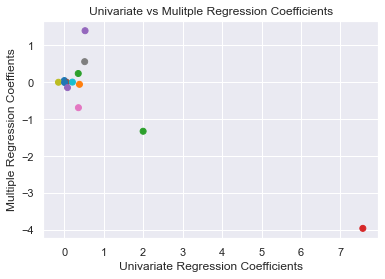

In [117]:
plt.scatter(x,y,c=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22',
                   '#17becf','#1f77b4','#2ca02c','#9467bd'])
plt.xlabel('Univariate Regression Coefficients')
plt.ylabel('Multiple Regression Coeffients')
plt.title('Univariate vs Mulitple Regression Coefficients')